# Part I

In class, we talked about the loss functions (also called the objective functions) for LASSO and Ridge regression. Write a function penalty that takes in a list of coefficients (coefs) and calculates the penalty term for LASSO when the argument lasso = True, and for Ridge when lasso = False.

The penalty terms for LASSO and Ridge are listed below (K is the number of coefficients):

LASSO: $\alpha \sum_j^K|\beta_j|$

Ridge: $\alpha \sum_j^K\beta_j^2$

Note: for computational reasons, computer programs often use slightly different objective/loss functions. But the simple ones we're using here still effectively communicate the ideas behind Ridge and Lasso

In [15]:
def penalty(alpha = 0.01,coefs = [1,1,1], lasso = True):
    coefslist = []
    if lasso == True:
        for i in coefs:
            coef_new = i*i
            coefslist.append(coef_new)
        coefs_final = sum(coefslist)
        answer = alpha * coefs_final
    if lasso == False:
        for i in coefs:
            coef_new = abs(i)
            coefslist.append(coef_new)
        coefs_final = sum(coefslist)
        answer = alpha * coefs_final
    return answer
    pass

In [16]:
penalty(alpha = 1, coefs = [1,2,3,4,5,6], lasso = False)

21

In [17]:
penalty(alpha = 1, coefs = [1,2,3,4,5,6], lasso = True)

91

In [ ]:
# Check your work
penalty(alpha = 1, coefs = [1,2,3,4,5,6], lasso = False) == 21
penalty(alpha = 1, coefs = [1,2,3,4,5,6], lasso = True)== 91

# Part II

Below are two simulated data sets, related and unrelated. related has relationships/correlations between the variables. unrelated does not. Use PCA on these two simple data sets (variables are ALREADY standardized), make a scree plot for each data set and compare the amount of variance accounted for by the first Principal Components. In words, explain why you think they're different.


In the unrelated variables dataset, the scree plot is pretty much linear rather than exponential because the variables aren't related, so there isn't one principle component that does a really good job of explaining the data.
In the related variables dataset, the scree plot is exponential which shows that the first component does a really good job of explaining variation in the data, and the components after that don't do as good of a job.

In [19]:
import pandas as pd
from plotnine import *
from sklearn.decomposition import PCA

In [20]:
unrelated = pd.read_csv("https://raw.githubusercontent.com/cmparlettpelleriti/CPSC392ParlettPelleriti/master/Data/unrelated.csv")
related = pd.read_csv("https://raw.githubusercontent.com/cmparlettpelleriti/CPSC392ParlettPelleriti/master/Data/related.csv")

In [21]:
unrelated.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10
0,-1.648512,-0.311947,0.709889,-0.450921,0.078148,1.647467,1.261174,0.409624,-1.088260,-0.522964
1,2.322691,0.166211,1.979451,-0.389167,-0.361379,-0.897038,-0.887620,0.821673,-0.035624,0.720553
2,-0.136621,-1.255330,0.896551,-0.777137,0.229754,1.190060,0.160624,-0.440312,1.016557,0.788108
3,-0.392706,0.572386,-0.309853,-0.582313,0.352875,-0.656241,-0.613229,0.581652,-0.907961,-0.885951
4,-0.380287,1.629653,0.935198,0.327958,-1.474270,0.813000,1.493190,0.691941,1.016842,0.319527


In [22]:
features = unrelated.columns[1:10] 
pca = PCA()
pca.fit(unrelated[features])

PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [23]:
pcaDF = pd.DataFrame({"expl_var" : pca.explained_variance_ratio_, "pc": range(1,10), "cum_var": pca.explained_variance_ratio_.cumsum()})
pcaDF.head()

,expl_var,pc,cum_var
0,0.131769,1,0.131769
1,0.125279,2,0.257048
2,0.118632,3,0.375680
3,0.117665,4,0.493345
4,0.107701,5,0.601045


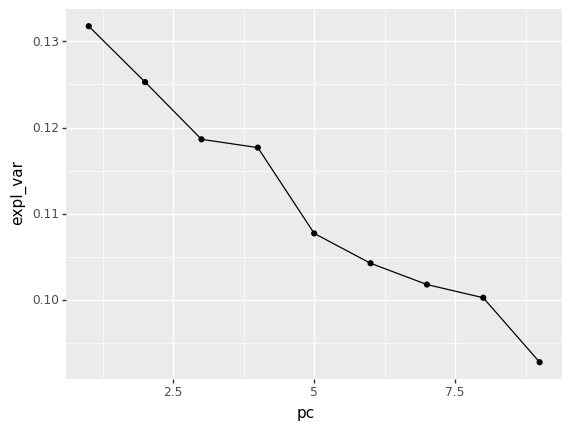

<ggplot: (304463797)>

In [24]:
(ggplot(pcaDF, aes(x = "pc", y = "expl_var")) + geom_line() + geom_point())

In [26]:
related.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10
0,-0.162819,-1.571162,-1.151371,-0.315459,-1.391184,-1.003480,-1.115696,-1.066398,-1.403418,-1.887823
1,-0.096220,0.657607,0.548894,-0.166629,0.815083,1.103737,0.464634,0.523476,1.351986,0.393608
2,0.667393,-0.210511,-0.371827,-0.738546,-0.335431,-0.836773,-0.814206,-1.380620,0.095171,0.223744
3,1.810516,1.450446,1.944058,1.178601,1.337714,2.193921,0.857411,0.366791,1.491955,2.181504
4,-0.109431,-0.581918,-1.065343,-0.402842,-1.540439,-1.179681,-1.086468,-0.150108,-0.994551,-1.437609


In [27]:
features2 = related.columns[1:10] 
pca2 = PCA()
pca2.fit(related[features2])

PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [28]:
pcaDF2 = pd.DataFrame({"expl_var" : pca2.explained_variance_ratio_, "pc": range(1,10), "cum_var": pca.explained_variance_ratio_.cumsum()})
pcaDF2.head()

,expl_var,pc,cum_var
0,0.752052,1,0.131769
1,0.037199,2,0.257048
2,0.034878,3,0.375680
3,0.032425,4,0.493345
4,0.031428,5,0.601045


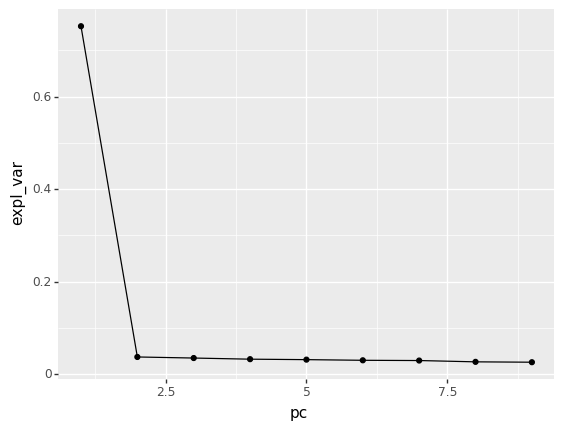

<ggplot: (305965789)>

In [29]:
(ggplot(pcaDF2, aes(x = "pc", y = "expl_var")) + geom_line() + geom_point())